In [2]:
#hide
! [ -e /content ] && pip install -Uqq fastbook && pip install timm
import fastbook
fastbook.setup_book()

In [3]:
#hide
import timm
from fastbook import *
from fastai.vision.widgets import *

In [4]:
import os
data_path = os.path.join('/storage/rock-paper-scissors', 'rockpaperscissors')

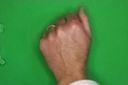

In [5]:
paths = get_image_files(data_path)

im = Image.open(paths[0])
im.shape
im.to_thumb(128,128)

In [6]:
rps_db = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(size=128, min_scale=0.5),
    batch_tfms=aug_transforms())

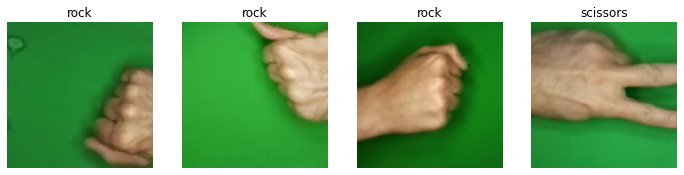

In [7]:
rps_dls = rps_db.dataloaders(data_path)
rps_dls.train.show_batch(max_n=4, unique=False, nrows=1)

In [8]:
learn = vision_learner(rps_dls, resnet50, metrics=error_rate)


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [9]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.117505,0.027156,0.006865,00:09
1,0.090005,0.022811,0.013730,00:08


In [13]:
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_small_384_in22ft1k',
 'convnext_small_in22ft1k',
 'convnext_small_in22k',
 'convnext_tiny',
 'convnext_tiny_384_in22ft1k',
 'convnext_tiny_hnf',
 'convnext_tiny_in22ft1k',
 'convnext_tiny_in22k',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_xlarge_in22k']

In [13]:
learn = vision_learner(rps_dls, 'convnext_tiny_in22k', metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.071386,0.013478,0.004577,00:26


In [ ]:
learn.export()